In [113]:
# packages and globals
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# linear regression
from sklearn.linear_model import LinearRegression
# inline mat
%matplotlib inline
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.dpi'] = 300
import tushare as ts
ts.set_token('4167d168dd2c182108319b0f5fc93d66b21d5ccf2baa2af2a522b80d')
pro = ts.pro_api()

# quiet 执行不显示warning
import warnings
warnings.filterwarnings('ignore')

start_date = '2016-01-01'
end_date = '2022-01-01'
# read merge3
merge3 = pd.read_csv('/home/zuohaolan/_WorkSpace/projects/DRL-for-QT/PB_ROE/merge3.csv')
merge3['trade_date'] = pd.to_datetime(merge3['trade_date'])
# 保留end_date之前的数据
merge3 = merge3[merge3['trade_date'] <= end_date]
merge3.tail(5)

,ts_code,roe,trade_date,turnover_rate,pb,log_pb
1381,601998.SH,9.2251,2020-12-31,0.0656,0.5484,-0.600750
1382,601998.SH,2.8317,2021-03-31,0.0776,0.5717,-0.559141
1383,601998.SH,5.0697,2021-06-30,0.0368,0.5177,-0.658359
1384,601998.SH,7.2097,2021-09-30,0.0406,0.4624,-0.771325
1385,601998.SH,9.5042,2021-12-31,0.0356,0.4561,-0.785043


In [108]:
# merge3保留2021-01-01之前的数据
merge3 = merge3[merge3['trade_date'] <= '2021-06-30']
merge3.tail(10)

,ts_code,roe,trade_date,turnover_rate,pb,log_pb
1374,601998.SH,2.9700,2019-03-31,0.2318,0.7662,-0.266312
1375,601998.SH,6.3350,2019-06-30,0.0438,0.6983,-0.359106
1376,601998.SH,8.9815,2019-09-30,0.0501,0.6770,-0.390084
1377,601998.SH,10.0663,2019-12-31,0.0479,0.6977,-0.359966
1378,601998.SH,2.7418,2020-03-31,0.0490,0.5771,-0.549740
1379,601998.SH,4.8734,2020-06-30,0.1996,0.5492,-0.599293
1380,601998.SH,7.0228,2020-09-30,0.0357,0.5458,-0.605503
1381,601998.SH,9.2251,2020-12-31,0.0656,0.5484,-0.600750
1382,601998.SH,2.8317,2021-03-31,0.0776,0.5717,-0.559141
1383,601998.SH,5.0697,2021-06-30,0.0368,0.5177,-0.658359


In [24]:
# merge3筛选出12月的数据
merge3 = merge3[merge3['trade_date'].dt.month == 12]
merge3.tail(10)

,ts_code,roe,trade_date,turnover_rate,pb,log_pb
1345,601988.SH,11.5848,2018-12-31,0.0517,0.7186,-0.330450
1349,601988.SH,10.8180,2019-12-31,0.0352,0.6678,-0.403767
1353,601988.SH,9.9159,2020-12-31,0.0526,0.5443,-0.608255
1357,601988.SH,10.1586,2021-12-31,0.0357,0.4825,-0.728774
1365,601998.SH,11.9458,2016-12-31,0.0698,0.9167,-0.086975
1369,601998.SH,10.9303,2017-12-31,0.0323,0.8405,-0.173758
1373,601998.SH,10.6452,2018-12-31,0.0611,0.6853,-0.377899
1377,601998.SH,10.0663,2019-12-31,0.0479,0.6977,-0.359966
1381,601998.SH,9.2251,2020-12-31,0.0656,0.5484,-0.600750
1385,601998.SH,9.5042,2021-12-31,0.0356,0.4561,-0.785043


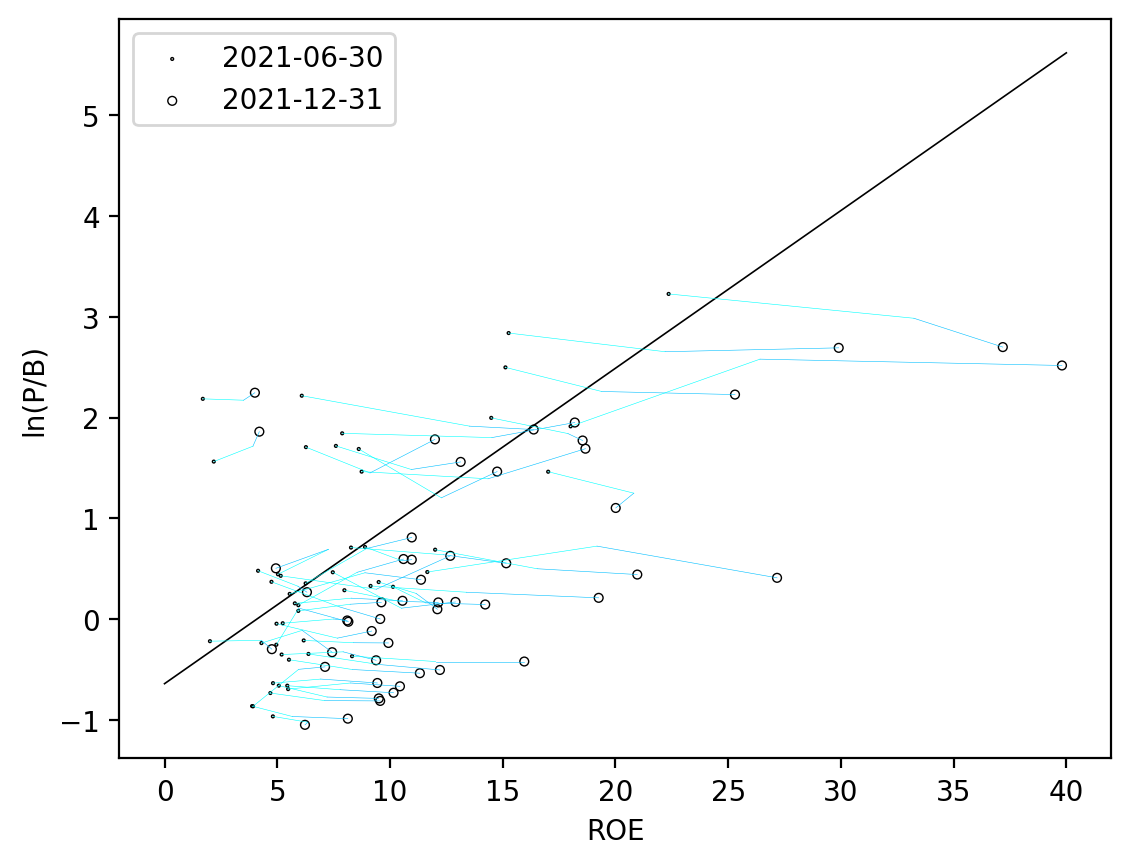

In [114]:
var_y = 'log_pb'

last_date = '2021-12-31'

# 分位数回归
# import statsmodels.api as sm
# y = merge3[merge3['trade_date'] == '2021-12-31'][var_y]
# X = merge3[merge3['trade_date'] == '2021-12-31'][['roe']]
# # 带截距的回归
# X = sm.add_constant(X)
# quant_reg = sm.QuantReg(y, X)
# # fit
# quant_reg_fit_mid = quant_reg.fit(q=0.5)
# quant_reg_fit_best = quant_reg.fit(q=0.1)
# quant_reg_fit_worst = quant_reg.fit(q=0.9)
# # plot
# plt.plot(merge3[merge3['trade_date'] == 'last_date']['roe'], quant_reg_fit_mid.predict(X),linewidth=1,label='mid')
# plt.plot(merge3[merge3['trade_date'] == 'last_date']['roe'], quant_reg_fit_best.predict(X),linewidth=1,label='best')
# plt.plot(merge3[merge3['trade_date'] == 'last_date']['roe'], quant_reg_fit_worst.predict(X),linewidth=1,label='worst')
# plt.legend()


# 线性回归
reg = LinearRegression()
test_date_num = 3

# fit
# reg.fit(merge3[['roe']], merge3[var_y])
# 对于最后一个时间点的数据，进行回归
reg_date = 'last_date'
reg_dates = ['2020-12-31','2021-03-31','2021-06-30','2021-09-30','2021-12-31']

# reg_dates = ['2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31']

for reg_date in reg_dates[-test_date_num:-test_date_num+1]:
    reg.fit(merge3[merge3['trade_date'] == reg_date][['roe']], merge3[merge3['trade_date'] == reg_date][var_y])
    # 画最后一个时间点的回归线，横坐标[0,40]
    # plt.plot([0,40], reg.predict([[0],[40]]),linewidth=0.6,label=reg_date+' equi',c='k') 
    handle0 = plt.plot([0,40], reg.predict([[0],[40]]),linewidth=0.6,c='k') 
# plt.legend(handle0, [reg_date+' equi'])
    # plt.plot(merge3[merge3['trade_date'] == reg_date]['roe'], reg.predict(merge3[merge3['trade_date'] == reg_date][['roe']]),linewidth=0.6,label=reg_date,c='k')

# reg.fit(merge3[['roe']], merge3[var_y])

# test_stock = '601601.SH'
# test_dates = ['2022-06-30','2022-09-30','last_date']
# plt.scatter(merge3['roe'], merge3['log_pb'],marker='.',s=1)

for test_stock in merge3['ts_code'].unique()[:]:
    # color_list = ['#00FFFF','#00BFFF','#1E90FF','#0000FF']
    # 一共三个点，第一个点到第二个点之间用 '#00BFFF' 这个颜色，第二个点到第三个点之间用 '#00FFFF'
    plt.plot(merge3[merge3['ts_code'] == test_stock]['roe'][-test_date_num:-test_date_num+2], merge3[merge3['ts_code'] == test_stock][var_y][-test_date_num:-test_date_num+2],linewidth=0.2,c='#00FFFF',markersize=1,markeredgecolor='black')
    plt.plot(merge3[merge3['ts_code'] == test_stock]['roe'][-test_date_num+1:], merge3[merge3['ts_code'] == test_stock][var_y][-test_date_num+1:],linewidth=0.2,c='#00BFFF',markersize=1,markeredgecolor='black')
    # plt.plot(merge3[merge3['ts_code'] == test_stock]['roe'][-test_date_num:], merge3[merge3['ts_code'] == test_stock][var_y][-test_date_num:],linewidth=0.2,c='black',markersize=1,markeredgecolor='black')
    
    # 空心圆
    handle1 = plt.scatter(merge3[merge3['ts_code'] == test_stock]['roe'][-3:-2], merge3[merge3['ts_code'] == test_stock][var_y][-3:-2],marker='o',edgecolors='black',facecolors='none',linewidth=0.5,s=1)
    handle2 = plt.scatter(merge3[merge3['ts_code'] == test_stock]['roe'][-1:], merge3[merge3['ts_code'] == test_stock][var_y][-1:],marker='o',edgecolors='black',facecolors='none',linewidth=0.5,s=10)
# plt.plot(merge3['roe'], reg.predict(merge3[['roe']]), color='black',linestyle=':',linewidth=1) 

plt.xlabel('ROE')
plt.ylabel('ln(P/B)')
# plt.legend()
plt.legend([handle0, handle1,handle2],[reg_date+' equilibrium','2021-06-30','2021-12-31'])
# plt.legend([handle0, handle1],[reg_date+' equilibrium','2020-12-31'])
plt.show()

In [58]:
merge3.trade_date.unique()

array(['2016-03-31T00:00:00.000000000', '2016-06-30T00:00:00.000000000',
       '2016-09-30T00:00:00.000000000', '2016-12-31T00:00:00.000000000',
       '2017-03-31T00:00:00.000000000', '2017-06-30T00:00:00.000000000',
       '2017-09-30T00:00:00.000000000', '2017-12-31T00:00:00.000000000',
       '2018-03-31T00:00:00.000000000', '2018-06-30T00:00:00.000000000',
       '2018-09-30T00:00:00.000000000', '2018-12-31T00:00:00.000000000',
       '2019-03-31T00:00:00.000000000', '2019-06-30T00:00:00.000000000',
       '2019-09-30T00:00:00.000000000', '2019-12-31T00:00:00.000000000',
       '2020-03-31T00:00:00.000000000', '2020-06-30T00:00:00.000000000',
       '2020-09-30T00:00:00.000000000', '2020-12-31T00:00:00.000000000',
       '2021-03-31T00:00:00.000000000', '2021-06-30T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [109]:
# yyyy-mm-dd格式 merge3.trade_date.unique()

# yyyy-mm-dd格式
reg_dates = ['2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
         '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
            '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
            '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31',
            '2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31','2021-03-31','2021-06-30']

# 2021-06-30

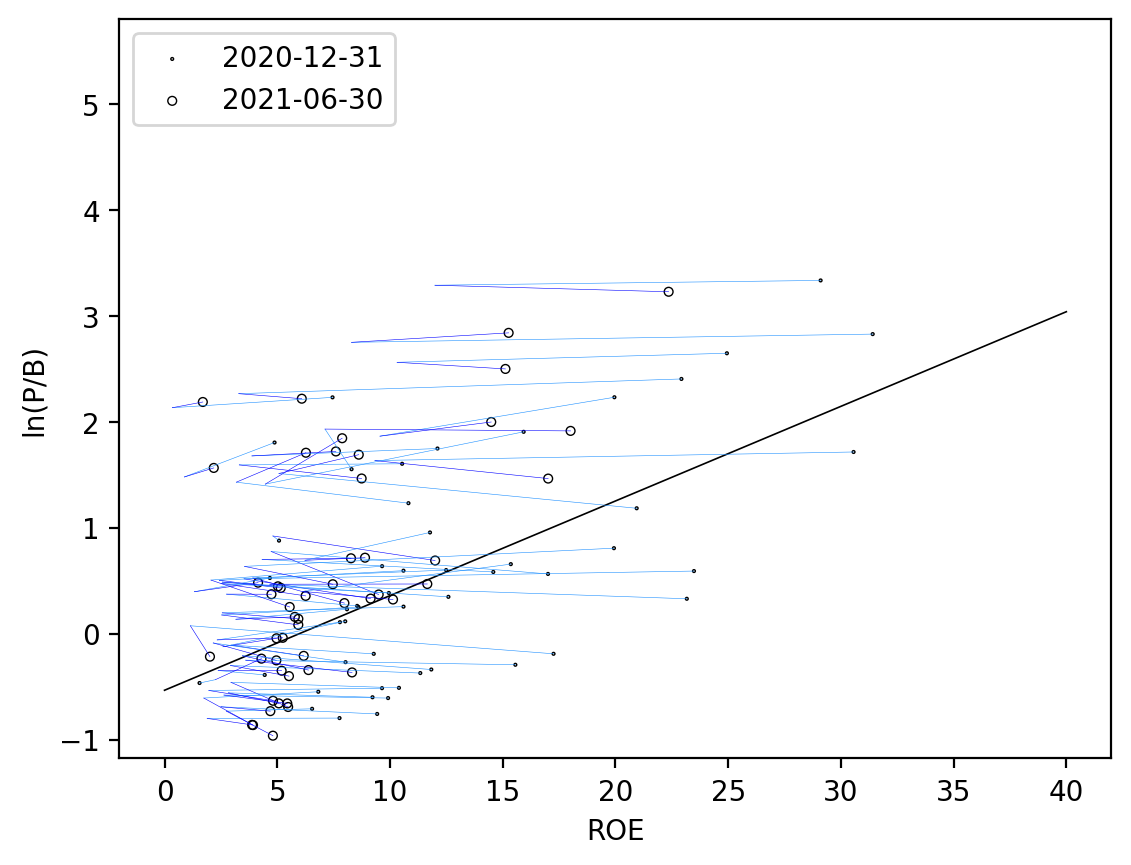

In [112]:
var_y = 'log_pb'

last_date = '2021-12-31'

# 分位数回归
# import statsmodels.api as sm
# y = merge3[merge3['trade_date'] == '2021-12-31'][var_y]
# X = merge3[merge3['trade_date'] == '2021-12-31'][['roe']]
# # 带截距的回归
# X = sm.add_constant(X)
# quant_reg = sm.QuantReg(y, X)
# # fit
# quant_reg_fit_mid = quant_reg.fit(q=0.5)
# quant_reg_fit_best = quant_reg.fit(q=0.1)
# quant_reg_fit_worst = quant_reg.fit(q=0.9)
# # plot
# plt.plot(merge3[merge3['trade_date'] == 'last_date']['roe'], quant_reg_fit_mid.predict(X),linewidth=1,label='mid')
# plt.plot(merge3[merge3['trade_date'] == 'last_date']['roe'], quant_reg_fit_best.predict(X),linewidth=1,label='best')
# plt.plot(merge3[merge3['trade_date'] == 'last_date']['roe'], quant_reg_fit_worst.predict(X),linewidth=1,label='worst')
# plt.legend()


# 线性回归
reg = LinearRegression()
test_date_num = 3

# fit
# reg.fit(merge3[['roe']], merge3[var_y])
# 对于最后一个时间点的数据，进行回归
reg_date = 'last_date'
# reg_dates = ['2020-12-31','2021-03-31','2021-06-30','2021-09-30','2021-12-31']
# reg_dates = merge3.trade_date.unique()

# reg_dates = ['2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31']

for reg_date in reg_dates[-test_date_num:-test_date_num+1]:
    reg.fit(merge3[merge3['trade_date'] == reg_date][['roe']], merge3[merge3['trade_date'] == reg_date][var_y])
    # 画最后一个时间点的回归线，横坐标[0,40]
    plt.plot([0,40], reg.predict([[0],[40]]),linewidth=0.6,label=reg_date,c='k') 


for test_stock in merge3['ts_code'].unique()[:]:
    # plt.plot(merge3[merge3['ts_code'] == test_stock]['roe'][-test_date_num:], merge3[merge3['ts_code'] == test_stock][var_y][-test_date_num:],linewidth=0.2,c='black',markersize=1,markeredgecolor='black')
    plt.plot(merge3[merge3['ts_code'] == test_stock]['roe'][-test_date_num:-test_date_num+2], merge3[merge3['ts_code'] == test_stock][var_y][-test_date_num:-test_date_num+2],linewidth=0.2,c='#1E90FF',markersize=1,markeredgecolor='black')
    plt.plot(merge3[merge3['ts_code'] == test_stock]['roe'][-test_date_num+1:], merge3[merge3['ts_code'] == test_stock][var_y][-test_date_num+1:],linewidth=0.2,c='#0000FF',markersize=1,markeredgecolor='black')
    handle1 = plt.scatter(merge3[merge3['ts_code'] == test_stock]['roe'][-3:-2], merge3[merge3['ts_code'] == test_stock][var_y][-3:-2],marker='o',edgecolors='black',facecolors='none',linewidth=0.5,s=1)
    # plt.scatter(merge3[merge3['ts_code'] == test_stock]['roe'][-2:-1], merge3[merge3['ts_code'] == test_stock][var_y][-2:-1],marker='o',edgecolors='black',facecolors='none',linewidth=0.5,s=5)
    # 空心圆
    handle2 = plt.scatter(merge3[merge3['ts_code'] == test_stock]['roe'][-1:], merge3[merge3['ts_code'] == test_stock][var_y][-1:],marker='o',edgecolors='black',facecolors='none',linewidth=0.5,s=10)

# plt.plot(merge3['roe'], reg.predict(merge3[['roe']]), color='black',linestyle=':',linewidth=1) 

plt.xlabel('ROE')
plt.ylabel('ln(P/B)')
# legend handle1:'2020-12-31'
plt.legend([handle1,handle2],['2020-12-31','2021-06-30'],loc='upper left')
# y上限为5 下限不设置
plt.ylim(top=5.8)
plt.show()

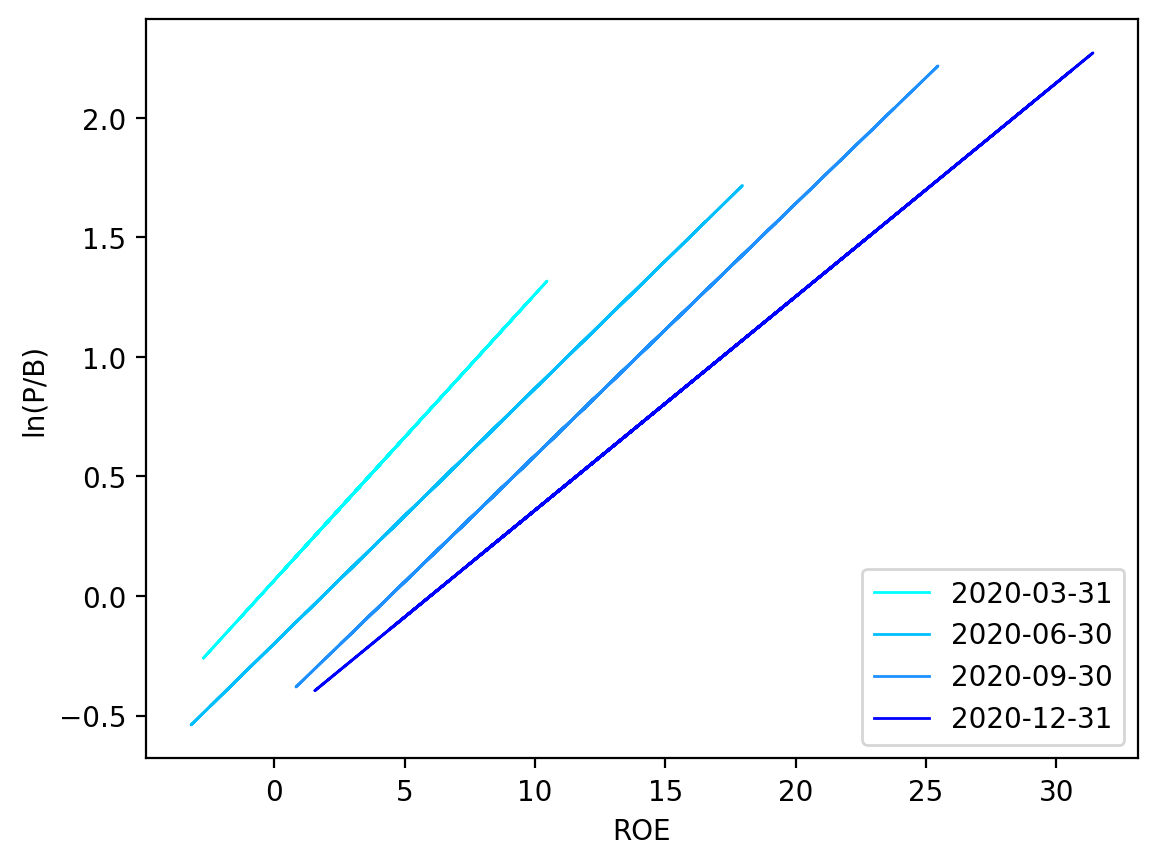

In [117]:
var_y = 'log_pb'

last_date = '2021-12-31'

# 分位数回归
# import statsmodels.api as sm
# y = merge3[merge3['trade_date'] == '2021-12-31'][var_y]
# X = merge3[merge3['trade_date'] == '2021-12-31'][['roe']]
# # 带截距的回归
# X = sm.add_constant(X)
# quant_reg = sm.QuantReg(y, X)
# # fit
# quant_reg_fit_mid = quant_reg.fit(q=0.5)
# quant_reg_fit_best = quant_reg.fit(q=0.1)
# quant_reg_fit_worst = quant_reg.fit(q=0.9)
# # plot
# plt.plot(merge3[merge3['trade_date'] == 'last_date']['roe'], quant_reg_fit_mid.predict(X),linewidth=1,label='mid')
# plt.plot(merge3[merge3['trade_date'] == 'last_date']['roe'], quant_reg_fit_best.predict(X),linewidth=1,label='best')
# plt.plot(merge3[merge3['trade_date'] == 'last_date']['roe'], quant_reg_fit_worst.predict(X),linewidth=1,label='worst')
# plt.legend()


# 线性回归
reg = LinearRegression()
test_date_num = 3

# fit
# reg.fit(merge3[['roe']], merge3[var_y])
# 对于最后一个时间点的数据，进行回归
reg_date = 'last_date'
# reg_dates = ['2020-12-31','2021-03-31','2021-06-30','2021-09-30','2021-12-31']
reg_dates = ['2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31']
# 只要12月,2016年以后的数据
# reg_dates = ['2016-12-31','2017-12-31','2018-12-31','2019-12-31','2020-12-31','2021-12-31']
# reg_dates = merge3.trade_date.unique()
color_list = ['#00FFFF','#00BFFF','#1E90FF','#0000FF']
color_list = color_list[::-1]
for reg_date in reg_dates[-4:]:
    reg.fit(merge3[merge3['trade_date'] == reg_date][['roe']], merge3[merge3['trade_date'] == reg_date][var_y])
    # 画最后一个时间点的回归线
    # 折线图浅蓝色变深蓝色
    plt.plot(merge3[merge3['trade_date'] == reg_date]['roe'], reg.predict(merge3[merge3['trade_date'] == reg_date][['roe']]),linewidth=1,label=reg_date,c=color_list.pop())

# reg.fit(merge3[['roe']], merge3[var_y])

# test_stock = '601601.SH'
# test_dates = ['2022-06-30','2022-09-30','last_date']
# plt.scatter(merge3['roe'], merge3['log_pb'],marker='.',s=1)

# for test_stock in merge3['ts_code'].unique()[:]:
#     plt.plot(merge3[merge3['ts_code'] == test_stock]['roe'][-test_date_num:], merge3[merge3['ts_code'] == test_stock][var_y][-test_date_num:],marker='.',linewidth=0.2,c='black',markersize=1,markeredgecolor='black')
#     # 空心圆
#     plt.scatter(merge3[merge3['ts_code'] == test_stock]['roe'][-1:], merge3[merge3['ts_code'] == test_stock][var_y][-1:],marker='o',edgecolors='black',facecolors='none',linewidth=0.5,s=10)
# plt.plot(merge3['roe'], reg.predict(merge3[['roe']]), color='black',linestyle=':',linewidth=1) 




plt.xlabel('ROE')
plt.ylabel('ln(P/B)')
# 右下
plt.legend(loc='lower right')
plt.show()

In [95]:
# 四个颜色rgb，浅蓝色到深蓝色
color_list = ['#00FFFF','#00BFFF','#1E90FF','#0000FF']


AttributeError: 'list' object has no attribute 'poplleft'